In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
df = pd.read_csv('./data/train.csv', index_col='date', parse_dates=True)

df.head()

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0
2013-01-01,1,1,BABY CARE,0.0,0
2013-01-01,2,1,BEAUTY,0.0,0
2013-01-01,3,1,BEVERAGES,0.0,0
2013-01-01,4,1,BOOKS,0.0,0


In [17]:
test_df = pd.read_csv('./data/test.csv', index_col='date', parse_dates=True)

test_df.head()

,id,store_nbr,family,onpromotion
date,,,,
2017-08-16,3000888,1,AUTOMOTIVE,0
2017-08-16,3000889,1,BABY CARE,0
2017-08-16,3000890,1,BEAUTY,2
2017-08-16,3000891,1,BEVERAGES,20
2017-08-16,3000892,1,BOOKS,0


In [18]:
df.tail()

,id,store_nbr,family,sales,onpromotion
date,,,,,
2017-08-15,3000883,9,POULTRY,438.133,0
2017-08-15,3000884,9,PREPARED FOODS,154.553,1
2017-08-15,3000885,9,PRODUCE,2419.729,148
2017-08-15,3000886,9,SCHOOL AND OFFICE SUPPLIES,121.000,8
2017-08-15,3000887,9,SEAFOOD,16.000,0


<AxesSubplot:xlabel='family'>

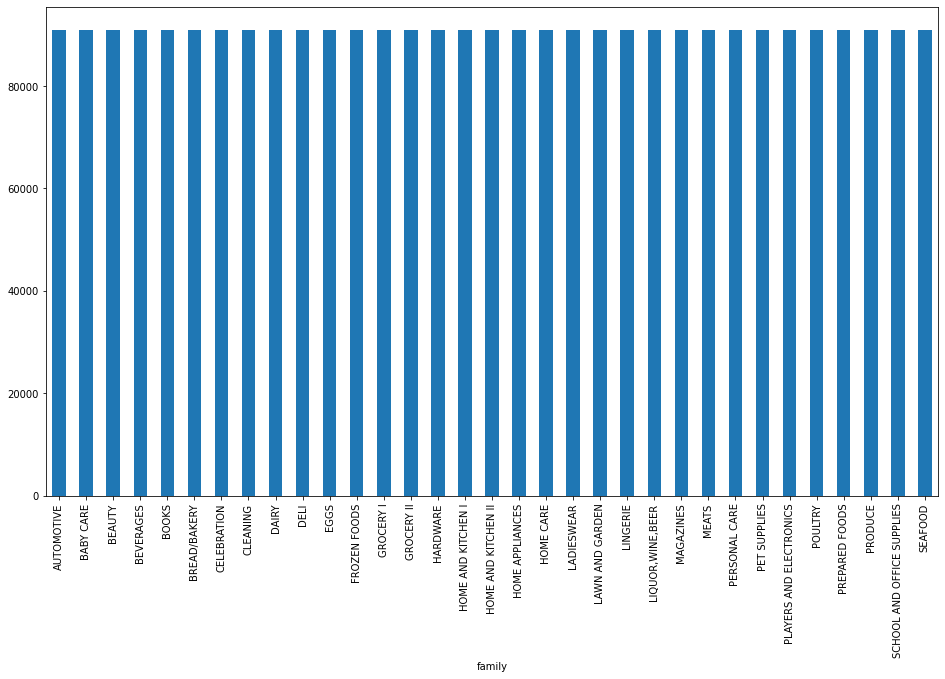

In [19]:
df.groupby('family').size().plot(kind='bar', figsize=(16,9))

<AxesSubplot:xlabel='store_nbr'>

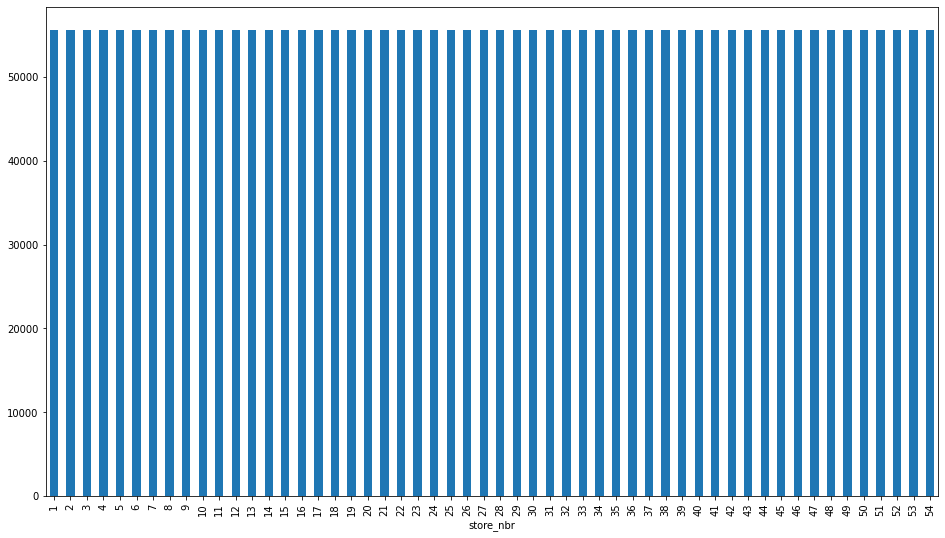

In [20]:
df.groupby('store_nbr').size().plot(kind='bar', figsize=(16,9))

In [21]:
families = df.groupby('family').size().index

family_dfs = []
for family in families:
    family_sub_df = df[df.family == family][['sales']].resample('D').sum().rename(columns={
        'sales': family
    })

    family_dfs.append(family_sub_df)

per_family_df = pd.concat(family_dfs, axis=1)

per_family_df.head()


,AUTOMOTIVE,BABY CARE,BEAUTY,BEVERAGES,BOOKS,BREAD/BAKERY,CELEBRATION,CLEANING,DAIRY,DELI,...,MAGAZINES,MEATS,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.0,0.0,2.0,810.0,0.0,180.58900,0.0,186.0,143.0,71.09000,...,0.0,110.801000,25.0,0.0,0.0,42.637000,37.847000,0.0,0.0,0.000000
2013-01-02,255.0,0.0,207.0,72092.0,0.0,26246.31900,0.0,74629.0,23381.0,15754.50000,...,0.0,20871.464028,17204.0,0.0,0.0,13975.884938,5338.111976,0.0,0.0,1526.750002
2013-01-03,161.0,0.0,125.0,52105.0,0.0,18456.48002,0.0,55893.0,18001.0,11172.45500,...,0.0,16597.398113,12568.0,0.0,0.0,10674.393983,3591.388005,0.0,0.0,1094.310994
2013-01-04,169.0,0.0,133.0,54167.0,0.0,16721.96901,0.0,52064.0,18148.0,10143.20900,...,0.0,21625.963055,11303.0,0.0,0.0,10772.515038,4472.965990,0.0,0.0,1293.120995
2013-01-05,342.0,0.0,191.0,77818.0,0.0,22367.76108,0.0,70128.0,23082.0,13734.94501,...,0.0,20879.091050,16819.0,0.0,0.0,13475.009055,5830.073020,0.0,0.0,1245.637004


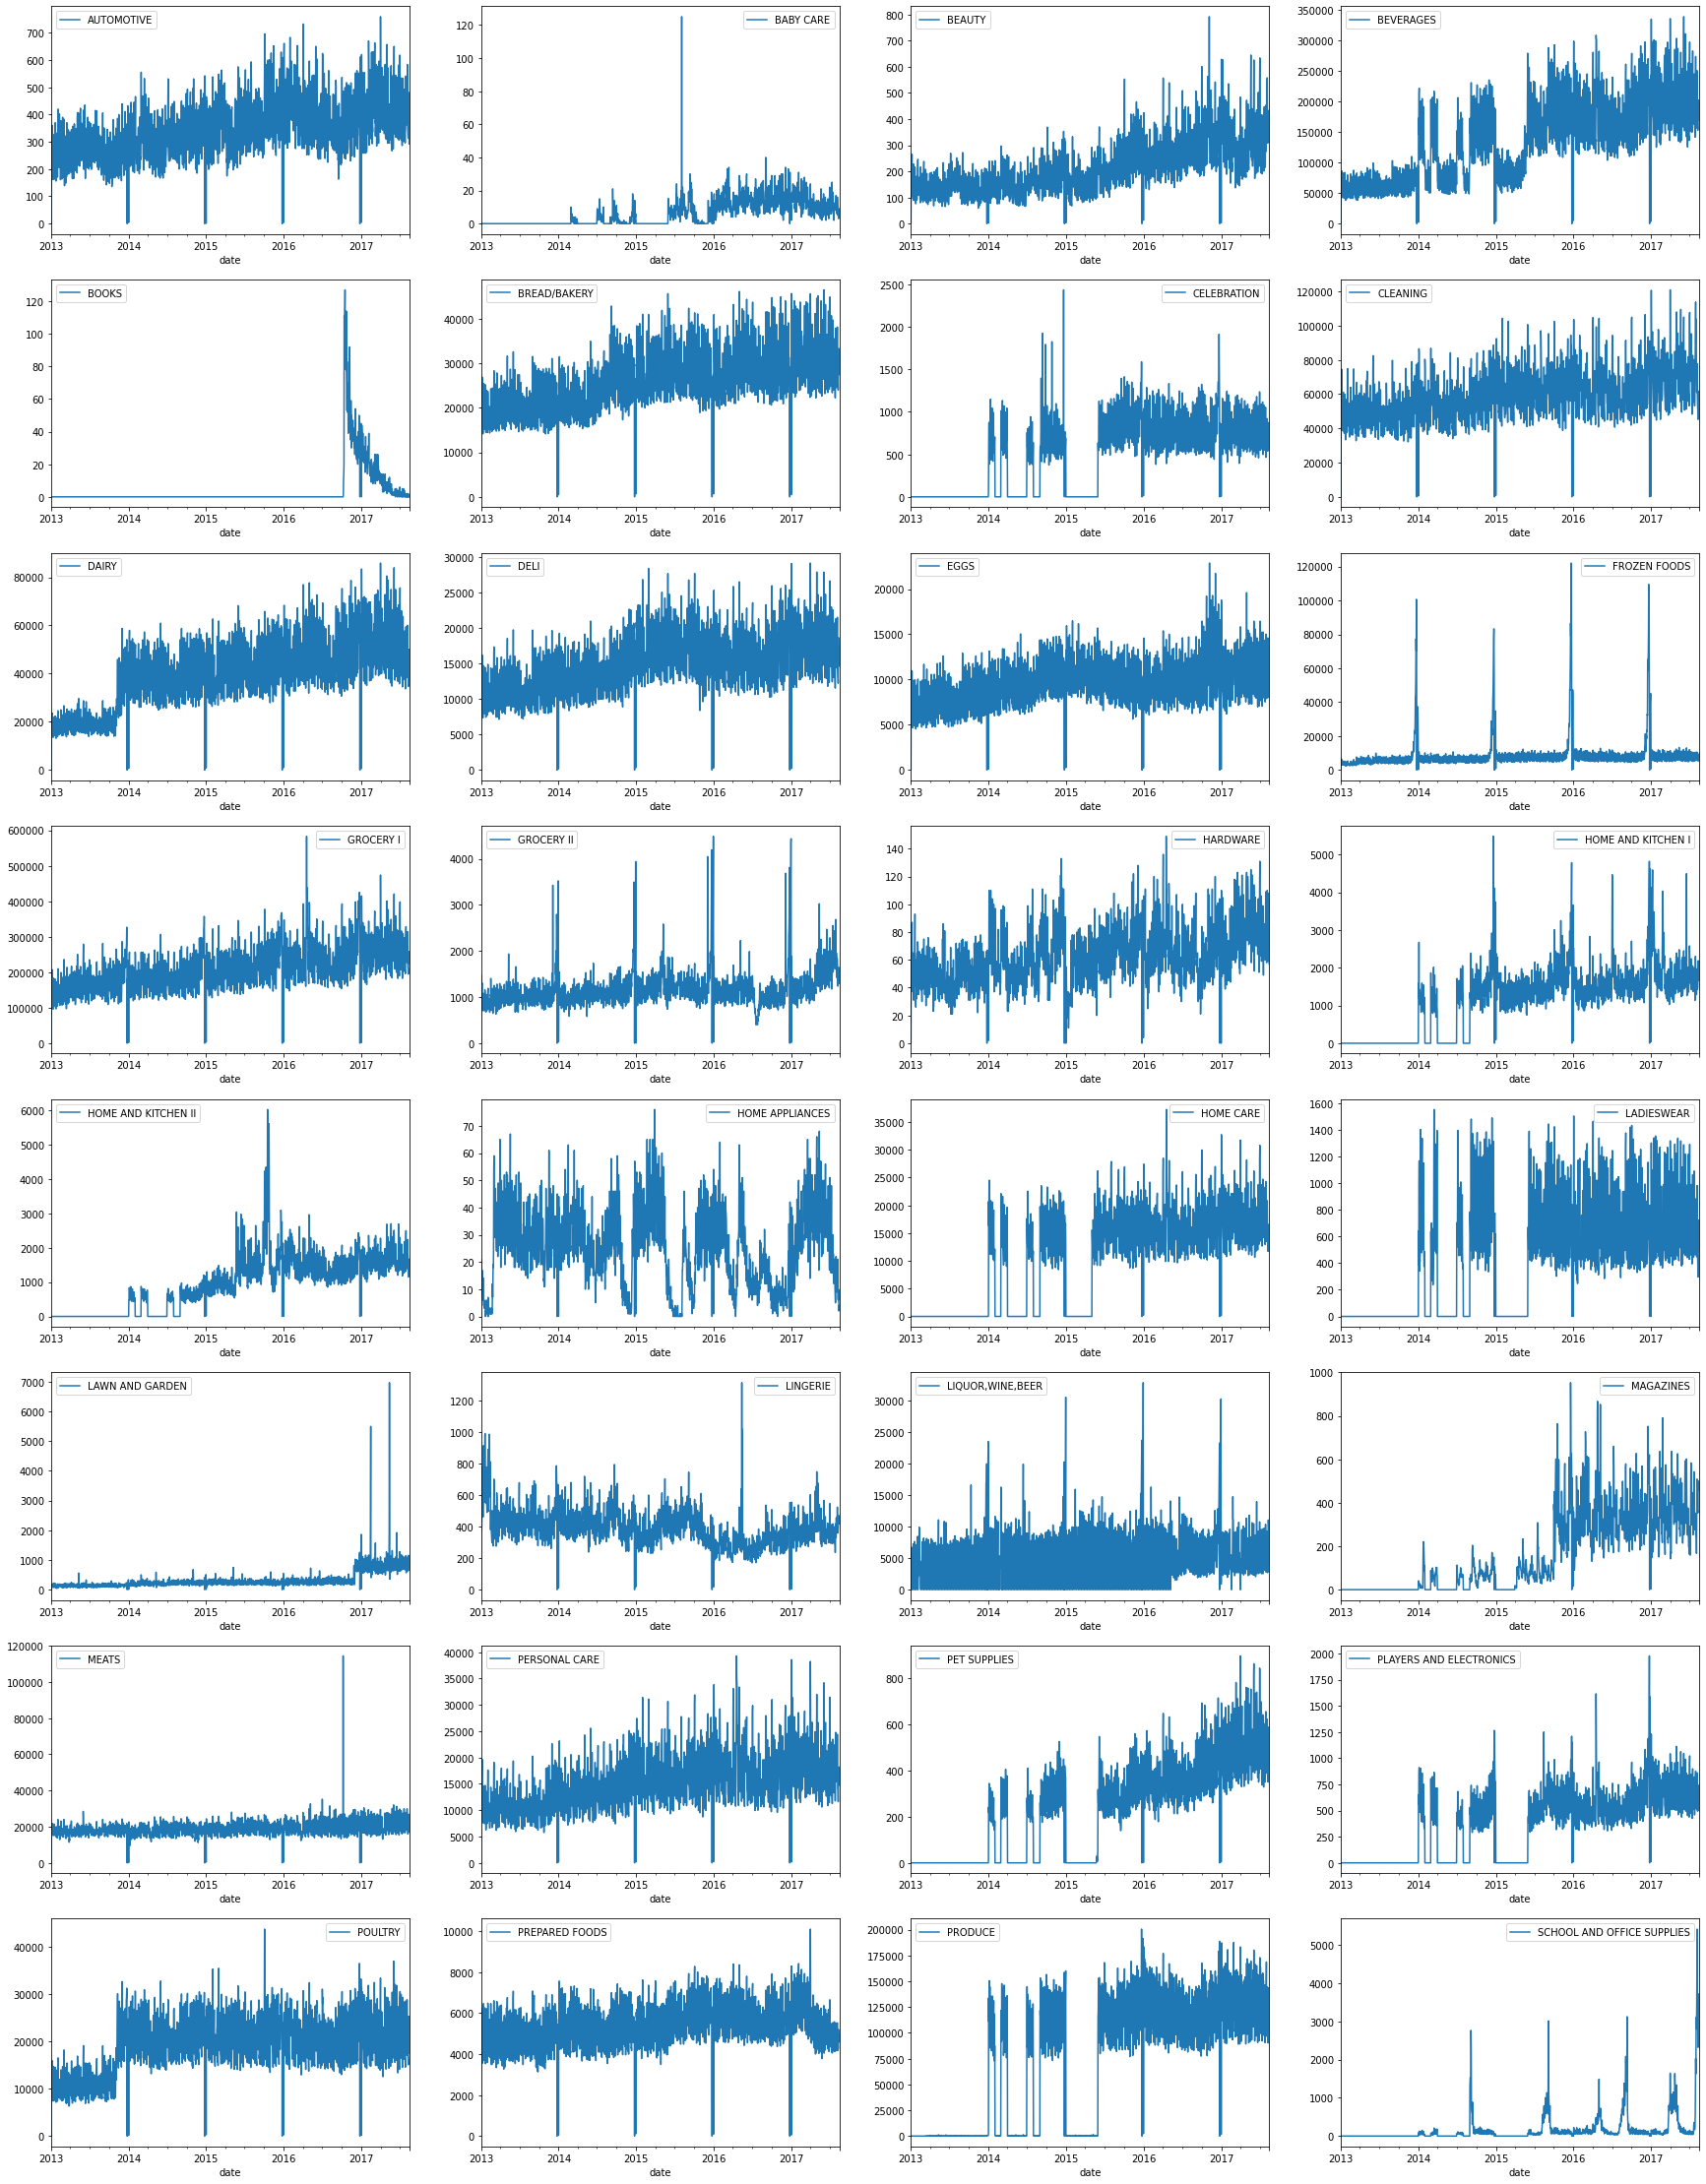

In [22]:
fig, rows = plt.subplots(nrows=8, ncols=4, figsize=(30,40))
axes = [ax for row in rows for ax in row]
for ax, family in zip(axes, per_family_df.columns):
    per_family_df[[family]].plot(ax=ax)

In [23]:
stores = df.groupby('store_nbr').size().index

store_dfs = []
for store in stores:
    store_sub_df = df[df.store_nbr == store][['sales']].resample('D').sum().rename(columns={
        'sales': f'store_{store}'
    })

    store_dfs.append(store_sub_df)

per_store_df = pd.concat(store_dfs, axis=1)

per_store_df.head()

,store_1,store_2,store_3,store_4,store_5,store_6,store_7,store_8,store_9,store_10,...,store_45,store_46,store_47,store_48,store_49,store_50,store_51,store_52,store_53,store_54
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000,0.00000,0.000000,0.0,0.0,0.000
2013-01-02,7417.148000,10266.718981,24060.348000,10200.083980,10598.619020,13520.485002,11997.502000,14659.32800,15867.484,5430.08800,...,27612.050950,27149.92000,27263.111010,19700.000000,16281.845,16576.13200,15134.490990,0.0,0.0,4973.285
2013-01-03,5873.244001,7612.540000,18570.745025,7400.245000,7770.968000,9929.393000,9277.958000,10781.24300,10431.719,4549.52998,...,17377.980970,15751.35500,18340.205000,14350.784030,9909.082,11066.46504,11170.057015,0.0,0.0,3901.570
2013-01-04,5919.879001,7526.377000,17392.097995,6902.050001,7347.641991,8869.211980,8096.573018,11124.65100,8085.159,3381.01600,...,19936.195040,17073.06408,18982.008970,15276.803001,10284.566,12147.44000,12452.326000,0.0,0.0,3266.966
2013-01-05,6318.785010,9539.566000,22700.872005,9948.383000,8192.598000,12431.689040,8610.605999,14277.69902,13057.110,5409.78501,...,27104.223034,27231.19803,26996.263995,22876.474000,13506.025,17930.36400,15046.247000,0.0,0.0,4394.549


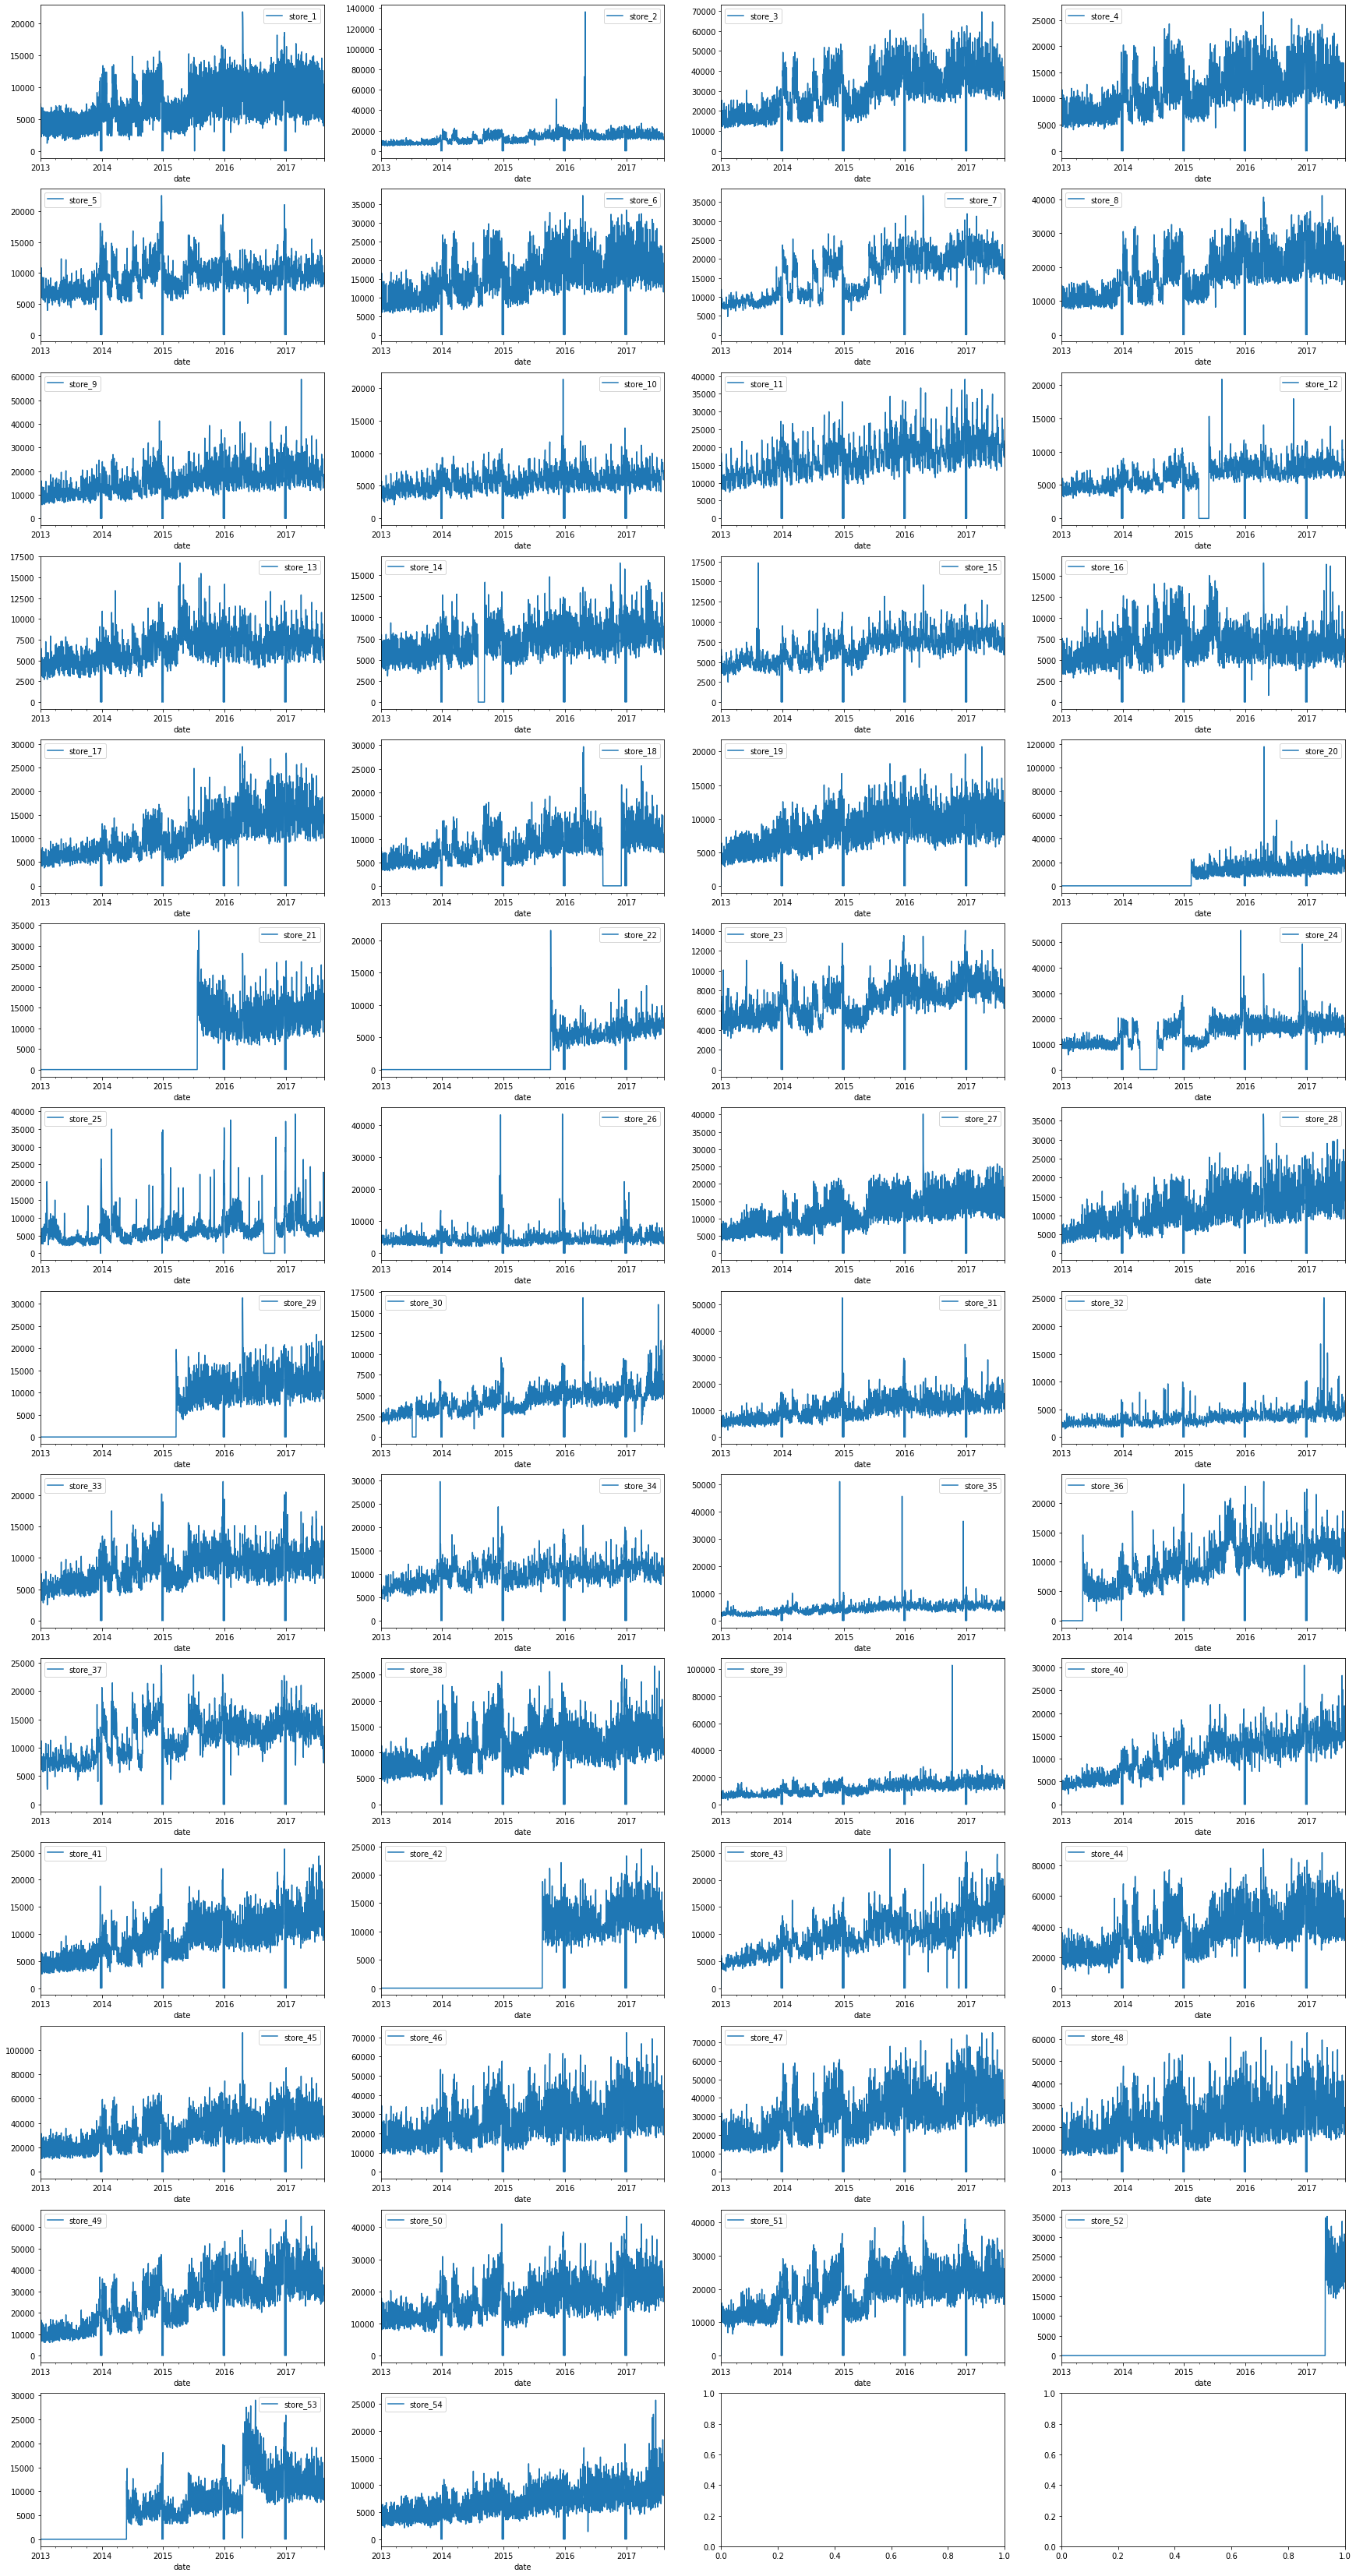

In [24]:

fig, rows = plt.subplots(nrows=14, ncols=4, figsize=(30,60))
axes = [ax for row in rows for ax in row]
for ax, store in zip(axes, per_store_df.columns):
    per_store_df[[store]].plot(ax=ax)

In [26]:
stores = df.store_nbr.unique()
families = df.family.unique()

families, stores

(array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
        'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
        'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
        'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
        'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
        'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
        'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
        'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
        'SEAFOOD'], dtype=object),
 array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
        25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
        40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
         7,  8,  9], dtype=int64))

In [57]:
from sklearn.metrics import mean_squared_log_error
test_period = 16

In [63]:
from statsmodels.tsa.api import ExponentialSmoothing

def run_exponential_smoothing(train_df, test_df):
    model = ExponentialSmoothing(train_df, trend="add", seasonal="add").fit()
    forecast = model.forecast(test_period)
    error = mean_squared_log_error(test_df, forecast.clip(lower=0), squared=False)
    return {'error': error, 'forecast': forecast}

In [ ]:
from itertools import product

regressions = {
    'ExponentialSmoothing': run_exponential_smoothing
}

# All methods shall return dict {'error': error, 'forecast': forecast}
# Use mean_squared_log_error(squared=False) as this is what is used in the competition

all_tests = {}
for i, (store, family) in enumerate(product(stores, families)):
    if i % 100 == 0:
        print(f'{i}/{len(stores) * len(families)}')

    store_family_df = df[(df.store_nbr == store) & (df.family == family)][['sales']].resample('D').mean().ffill()
    current_tests = {}
    for regression_name, regression_function in regressions.items():
        current_tests[regression_name] = regression_function(store_family_df.head(-test_period), store_family_df.tail(test_period))

    all_tests[(store, family)] = current_tests

#TO DO: add more regressions (idk, maybe prophet?), refactor to not have to run all regressions if we add a new one xd

In [72]:
all_tests

{(1,
  'AUTOMOTIVE'): {'ExponentialSmoothing': {'error': 0.5182095830590461,
   'model': <statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper at 0x2812fc77f40>}},
 (1,
  'BABY CARE'): {'ExponentialSmoothing': {'error': 0.0,
   'model': <statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper at 0x2812fc770d0>}},
 (1,
  'BEAUTY'): {'ExponentialSmoothing': {'error': 0.4183889360200913,
   'model': <statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper at 0x2812fcc8f10>}},
 (1,
  'BEVERAGES'): {'ExponentialSmoothing': {'error': 0.2928995200048074,
   'model': <statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper at 0x2812fc8f040>}},
 (1,
  'BOOKS'): {'ExponentialSmoothing': {'error': 0.18334544098989927,
   'model': <statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper at 0x2812fca5820>}},
 (1,
  'BREAD/BAKERY'): {'ExponentialSmoothing': {'error': 0.27547500846677075,
   'model': <statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper at 0x